#Rayyan Minhaj (20K-0143 | BCS-8B)

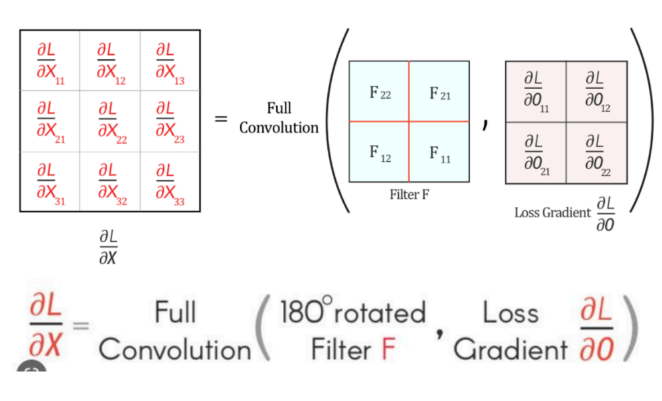

In [1]:
import numpy as np

In [3]:
#output matrix
dO = np.array([[1,2],
               [3,4]])

filter = np.array([[0,1],
                   [2,3]])

X = np.array([[200,300,400],
              [100,200,300],
              [150,200,300]])

First we need to rotate filter by 180 degrees

In [6]:
rot_filter = np.zeros((2,2))

def rotate_180(filter):
  for i in range(0,2):
    for j in range(0,2):
      rot_filter[i][j] = filter[1-i][1-j]

  return rot_filter


rot_filter = rotate_180(filter)

In [7]:
print(rot_filter)

[[3. 2.]
 [1. 0.]]


Now we need to perform convolution using this rotated filter and a padded dO matrix

In [8]:
dO_padded = np.pad(dO, pad_width=1, mode='constant', constant_values=0)

print(dO_padded)

[[0 0 0 0]
 [0 1 2 0]
 [0 3 4 0]
 [0 0 0 0]]


Now we apply convolution (I have already created this function in Part 3, so Im reusing the same function)

In [9]:
output_matrix = np.zeros((3,3))

In [10]:
def convolution_func(arr_padded, filter, output_matrix, stride):
    filter_height, filter_width = filter.shape
    input_height, input_width = arr_padded.shape

    for i in range(0, input_height - filter_height + 1, stride):
        for j in range(0, input_width - filter_width + 1, stride):

            # Extract the region of interest from the input array
            region = arr_padded[i:i+filter_height, j:j+filter_width]

            # Perform element-wise multiplication and sum
            output_value = np.sum(region * filter)

            # Calculate output indices
            output_i = i // stride
            output_j = j // stride

            # Assign the result to the output matrix
            output_matrix[output_i, output_j] = output_value

    return output_matrix


In [11]:
output_matrix = convolution_func(dO_padded, rot_filter,output_matrix,1)

In [12]:
print(output_matrix)

[[ 0.  1.  2.]
 [ 2. 10. 10.]
 [ 6. 17. 12.]]


Now we can use gradient descent to calculate updated neurons (X)

In [14]:
learning_rate=0.05

for i in range(0, np.shape(output_matrix)[0]):
  for j in range(0, np.shape(output_matrix)[0]):
    x_new = X[i][j] - learning_rate*output_matrix[i][j]
    print(f'X{i+1},{j+1} + = {x_new}')



X1,1 + = 200.0
X1,2 + = 299.95
X1,3 + = 399.9
X2,1 + = 99.9
X2,2 + = 199.5
X2,3 + = 299.5
X3,1 + = 149.7
X3,2 + = 199.15
X3,3 + = 299.4
